In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

In [2]:
# -----------------------------
# User Inputs (RAW input)
# -----------------------------
R = float(input("Thermal resistance R (e.g., 0.1 - 10): "))
C = float(input("Thermal capacitance C (e.g., 0.1 - 50): "))

# Transfer function G(s) = 1 / (C*s + 1/R)
num = [1]
den = [C, 1/R]
system = signal.TransferFunction(num, den)


Thermal resistance R (e.g., 0.1 - 10):  0.5
Thermal capacitance C (e.g., 0.1 - 50):  50


توضیح «پاسخ پله سیستم RC»

این نمودار نشان می‌دهد وقتی یک ورودی حرارتی ثابت به سیستم اعمال می‌کنیم، دما چگونه با گذشت زمان افزایش پیدا می‌کند.
به دلیل این‌که مدل حرارتی RC یک سیستم مرتبه اول است، پاسخ آن به صورت نمایی و آرام افزایش می‌یابد.
سرعت افزایش دما توسط ثابت زمانی τ = R × C تعیین می‌شود؛ هرچه τ بزرگ‌تر باشد، سیستم کندتر گرم می‌شود و این یعنی جسم حرارت‌پذیری بیشتری دارد.

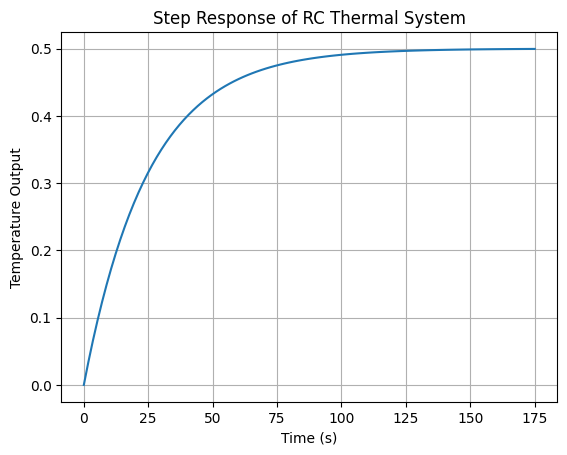

In [3]:
t, y = signal.step(system)
plt.figure()
plt.plot(t, y)
plt.title("Step Response of RC Thermal System")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output")
plt.grid(True)
plt.show()

این نمودار نشان می‌دهد سیستم حرارتی  مثل یک «فیلتر پایین‌گذر» رفتار می‌کند
فرکانس‌های پایین (تغییرات آهسته) به‌خوبی عبور می‌کنند، اما فرکانس‌های بالا (تغییرات سریع) شدیداً تضعیف می‌شوند
این موضوع کاملاً با طبیعت حرارت سازگار است
جسم نمی‌تواند با سرعت بالا دمای خود را تغییر دهد

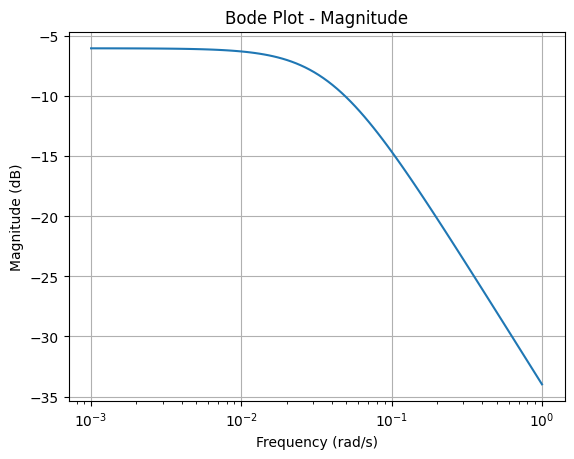

In [4]:
# Bode Plot (Magnitude)
w, mag, phase = signal.bode(system)
plt.figure()
plt.semilogx(w, mag)
plt.title("Bode Plot - Magnitude")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

در نمودار فاز مشاهده می‌شود که سیستم در فرکانس‌های بالا حدود ۹۰ درجه تأخیر فاز ایجاد می‌کند.
این یعنی دمای خروجی همیشه نسبت به ورودی تأخیر دارد، چون گرم شدن نیاز به زمان دارد و حرارت در سیستم ذخیره می‌شود.
این دقیقاً رفتار یک سیستم مرتبه اول است.

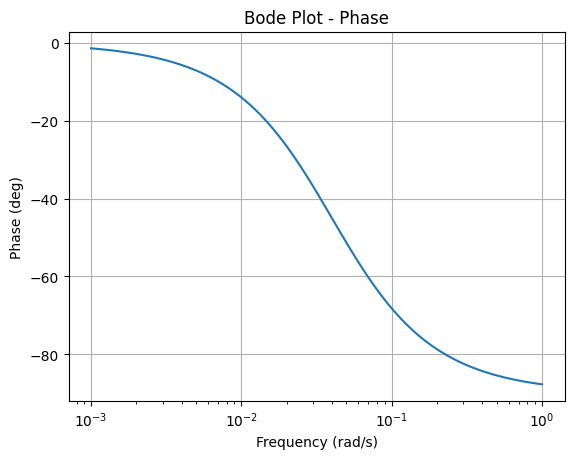

In [5]:
plt.figure()
plt.semilogx(w, phase)
plt.title("Bode Plot - Phase")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (deg)")
plt.grid(True)
plt.show()

توضیح «مقایسه پاسخ بدون کنترل و پاسخ سریع‌شده»

0.
حالت بدون کنترل

دما طبق یک منحنی نمایی آرام و بر اساس  بالا می‌رود.

حالت شبیه کنترل PID

فرض شده  باعث می‌شود سیستم سه برابر یا پنج برابر سریع‌تر به دمای هدف برسد

این فقط یک تقریب است ولی نشان می‌دهد کنترلر  چگونه روند افزایش دما را سریع‌تر می‌کند

این نمودار تفاوت بنیادی «سیستم آزاد» و «سیستم کنترل‌شده» را به‌خوبی نمایش می‌دهد

In [8]:
R = float(input("Thermal resistance R (e.g., 0.1 - 10): "))
C = float(input("Thermal capacitance C (e.g., 0.1 - 50): "))
factor = float(input("PID speed factor (e.g., 3): "))
sim_time = float(input("Simulation time (seconds)(e.g.,10 - 80): "))

tau = R * C
t = np.linspace(0, sim_time, 300)

# No control response
y_no_ctrl = 1 - np.exp(-t / tau)

# Fast response (approximation of PID)
y_pid = 1 - np.exp(-t / (tau / factor))

Thermal resistance R (e.g., 0.1 - 10):  0.5
Thermal capacitance C (e.g., 0.1 - 50):  50
PID speed factor (e.g., 3):  3
Simulation time (seconds)(e.g.,10 - 80):  150


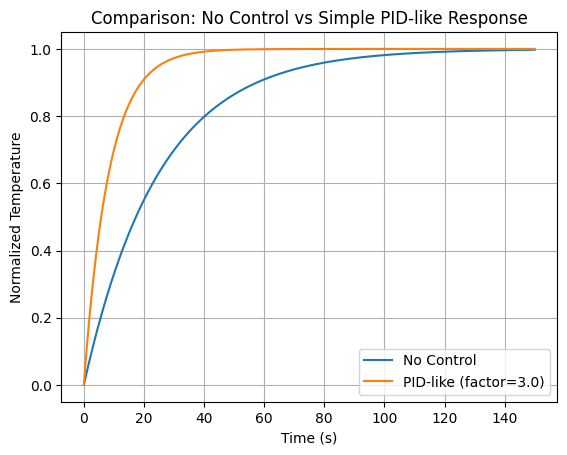

In [9]:
plt.figure()
plt.plot(t, y_no_ctrl, label="No Control")
plt.plot(t, y_pid, label=f"PID-like (factor={factor})")
plt.title("Comparison: No Control vs Simple PID-like Response")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Temperature")
plt.grid(True)
plt.legend()
plt.show()


In [12]:
# -----------------------------
# User Inputs (RAW)
# -----------------------------
R = float(input("Thermal resistance R (e.g., 0.1 - 10): "))
C = float(input("Thermal capacitance C (e.g., 0.1 - 50): "))

print('Proportional Gain')
Kp = float(input("Kp (e.g., 0.1 - 10): "))

print('Integral Gain')
Ki = float(input("Ki (e.g., 0.0 - 5): "))
print('Derivative Gain')

Kd = float(input("Kd (e.g., 0.0 - 2): "))
print('Derivative Gain')


# RC thermal system
G = signal.TransferFunction([1], [C, 1/R])

# PID: (Kd*s^2 + Kp*s + Ki) / s
PID = signal.TransferFunction([Kd, Kp, Ki], [1, 0])

# Open-loop = PID * G
open_loop = signal.TransferFunction(
    np.polymul([Kd, Kp, Ki], [1]),
    np.polymul([1, 0], [C, 1/R])
)
# Closed-loop = OL / (1 + OL)
num_cl = open_loop.num
den_cl = np.polyadd(open_loop.den, open_loop.num)
CL = signal.TransferFunction(num_cl, den_cl)


Thermal resistance R (e.g., 0.1 - 10):  0.5
Thermal capacitance C (e.g., 0.1 - 50):  50


Proportional Gain


Kp (e.g., 0.1 - 10):  5


Integral Gain


Ki (e.g., 0.0 - 5):  3


Derivative Gain


Kd (e.g., 0.0 - 2):  2


Derivative Gain


کنترل  واقعی (حلقه بسته)
 توضیح «پاسخ پله حلقه بسته با  واقعی»

نمودار نشان می‌دهد که کنترل‌کننده  باعث می‌شود

زمان رسیدن به مقدار نهایی کاهش یابد

خطای ماندگار تقریباً صفر شود

سیستم سریع‌تر و دقیق‌تر دما را دنبال کند

بسته به ضرایب  ممکن است کمی اورشوت داشته باشد

این نمودار تصویر واقعی نحوه عملکرد در سیستم حرارتی است.

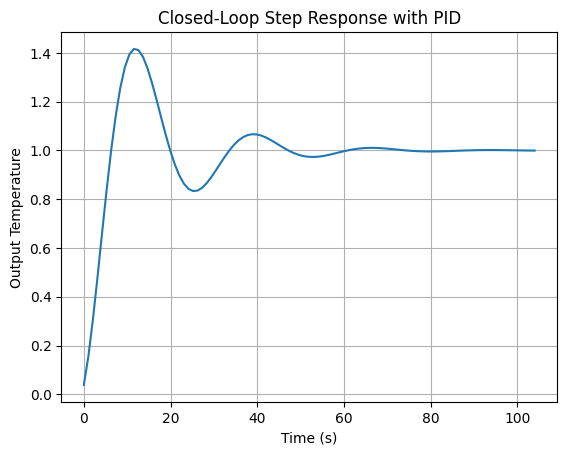

In [13]:
# Step Response (Closed loop)
t, y = signal.step(CL)
plt.figure()
plt.plot(t, y)
plt.title("Closed-Loop Step Response with PID")
plt.xlabel("Time (s)")
plt.ylabel("Output Temperature")
plt.grid(True)
plt.show()

«بود حلقه باز — Magnitude»

این نمودار برای تحلیل «پایداری» استفاده می‌شود.
هرچه بهره در فرکانس‌های پایین بیشتر باشد، توانایی دنبال‌کردن سیگنال بهتر می‌شود.
در فرکانس‌های بالا،  معمولاً بهره را کاهش می‌دهد تا نویز و نوسان کنترل شود.

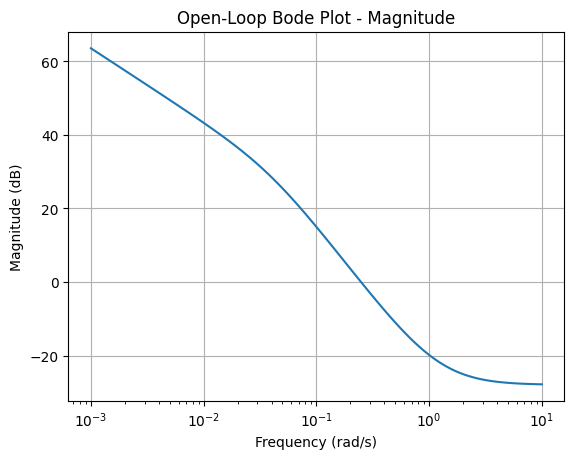

In [14]:
# Bode - Open loop magnitude
w, mag, phase = signal.bode(open_loop)
plt.figure()
plt.semilogx(w, mag)
plt.title("Open-Loop Bode Plot - Magnitude")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

توضیح بود حلقه باز 

فاز حلقه باز برای فهمیدن احتمال ناپایداری بسیار مهم است.
اگر مجموع فاز در نقطه عبور از 0  به نزدیکی −180° برسد، سیستم ممکن است نوسانی شود.
این نمودار نشان می‌دهد کنترل‌کننده و سیستم چطور روی هم تأثیر می‌گذارند.

In [ ]:
# Bode - Open loop phase
plt.figure()
plt.semilogx(w, phase)
plt.title("Open-Loop Bode Plot - Phase")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (deg)")
plt.grid(True)
plt.show()


 PID + محدودیت Heater + اغتشاش
 توضیح «کنترل  واقعی با محدودیت توان و اغتشاش محیطی»

در این نمودار:

 سعی می‌کند دما را به مقدار تنظیم‌شده برساند

 یک محدودیت دارد (مثل هیتر واقعی که بیشتر از حد نمی‌تواند کار کند)

در یک بازه زمانی اغتشاش وارد می‌شود (مثلاً باز شدن پنجره، ورود هوای سرد)

کنترل کننده تلاش می‌کند دما را به حالت قبلی برگرداند

این نمودار نشان می‌دهد سیستم کنترل در دنیای واقعی چطور با محدودیت‌ها و اختلال‌ها مقابله می‌کند

Thermal resistance R (e.g., 0.1 - 10):  3
Thermal capacitance C (e.g., 0.1 - 50):  49


Proportional Gain


Kp (e.g., 0.1 - 10):  7


Integral Gain


Ki (e.g., 0.0 - 5):  4


Derivative Gain


Kd (e.g., 0.0 - 2):  1.5


Derivative Gain


Initial temperature (e.g., 0°C- 50°C):  45
Setpoint temperature (e.g., 10°C- 80°C):  75
Maximum heater power (e.g., 0.1°C- 10°C):  9
Simulation time (seconds) (e.g., 20°C- 300°C):  120
Time step dt (e.g., 0.1 - 5):  5
Disturbance start time:  3
Disturbance end time:  90
Disturbance value (°C) (e.g., (-10) - (10)):  9


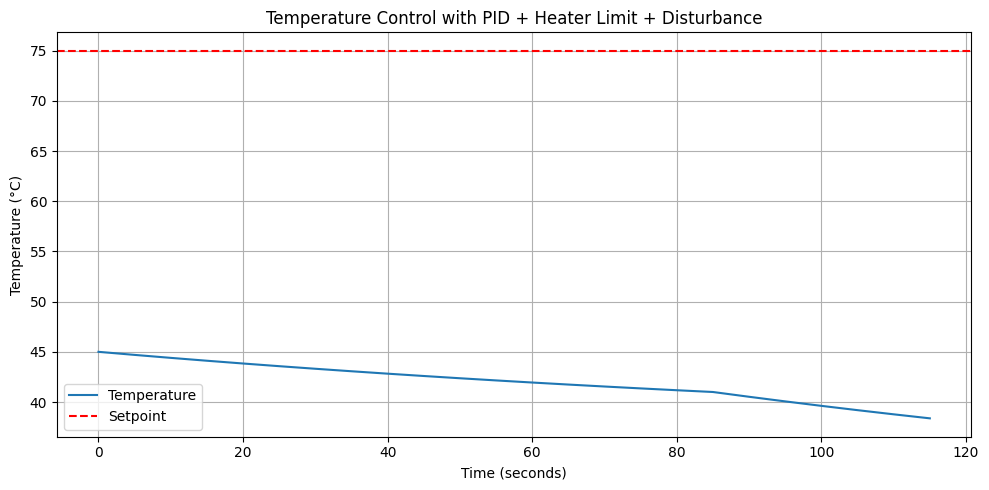

In [3]:
# ---------------------------------------------------------
# User inputs (raw input, no validation)
# ---------------------------------------------------------

R = float(input("Thermal resistance R (e.g., 0.1 - 10): "))
C = float(input("Thermal capacitance C (e.g., 0.1 - 50): "))

print('Proportional Gain')
Kp = float(input("Kp (e.g., 0.1 - 10): "))

print('Integral Gain')
Ki = float(input("Ki (e.g., 0.0 - 5): "))
print('Derivative Gain')

Kd = float(input("Kd (e.g., 0.0 - 2): "))
print('Derivative Gain')

T_initial = float(input("Initial temperature (e.g., 0°C- 50°C): "))
T_set     = float(input("Setpoint temperature (e.g., 10°C- 80°C): "))

U_MAX = float(input("Maximum heater power (e.g., 0.1°C- 10°C): "))

sim_time = float(input("Simulation time (seconds) (e.g., 20°C- 300°C): "))
dt       = float(input("Time step dt (e.g., 0.1 - 5): "))

d_start = float(input("Disturbance start time: "))
d_end   = float(input("Disturbance end time: "))
d_value = float(input("Disturbance value (°C) (e.g., (-10) - (10)): "))


# ---------------------------------------------------------
# Simulation model
# ---------------------------------------------------------

tau = R * C
t = np.arange(0, sim_time, dt)
T = np.zeros_like(t)

T[0] = T_initial
integral = 0
prev_error = 0

# Disturbance vector
dist = np.zeros_like(t)
dist[int(d_start / dt):int(d_end / dt)] = d_value


# ---------------------------------------------------------
# PID + Heater Limit simulation loop
# ---------------------------------------------------------

for i in range(1, len(t)):
    error = T_set - T[i - 1]

    # PID calculations
    integral += error * dt
    derivative = (error - prev_error) / dt

    # Controller output
    u = Kp * error + Ki * integral + Kd * derivative

    # Heater power limit
    u = np.clip(u, 0, U_MAX)

    # RC thermal model
    dT = (-(T[i - 1]) + u * R + dist[i]) / tau
    T[i] = T[i - 1] + dT * dt

    prev_error = error


# ---------------------------------------------------------
# Plot results
# ---------------------------------------------------------

plt.figure(figsize=(10, 5))
plt.plot(t, T, label="Temperature")
plt.axhline(T_set, color="red", linestyle="--", label="Setpoint")
plt.title("Temperature Control with PID + Heater Limit + Disturbance")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
